In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvo as vo
from IPython.display import Image as ipImage, display
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm
import sys
import matplotlib as mpl
from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS

In [2]:
hudf = []
hudf_header = []
xmin = 3000
xmax = 7000
ymin = 3000
ymax = 7000
print('Loading Hubble UDF fits files...')
for i, c in enumerate(['i', 'v', 'b']):
    txt = f'\r    Loading {c} image'
    sys.stdout.write(txt)
    sys.stdout.flush()
    with fits.open(f'data/h_udf_wfc_{c}_drz_img.fits') as hdul:
        #hudf.append(hdul[0].data[xmin:xmax,ymin:ymax])
        hudf.append(hdul[0].data)
        hudf_header.append(hdul[0].header)
print('')
print('Finished Loading')

Loading Hubble UDF fits files...
    Loading b image
Finished Loading


In [3]:
hudf[0].shape

(10500, 10500)

In [4]:
wcs = WCS(hudf_header[0])

In [30]:
hist_data= hudf[0].ravel()
logbins = np.logspace(-4, 10, 10)

In [20]:
log_hist_data = np.log10(hist_data)


/tmp/ipykernel_2993/3158641896.py:1: RuntimeWarning: divide by zero encountered in log10
  log_hist_data = np.log10(hist_data)
/tmp/ipykernel_2993/3158641896.py:1: RuntimeWarning: invalid value encountered in log10
  log_hist_data = np.log10(hist_data)


(array([2.46708e+05, 1.71600e+03, 6.02000e+02, 3.10000e+02, 1.53000e+02,
        8.10000e+01, 6.40000e+01, 4.40000e+01, 3.10000e+01, 2.30000e+01,
        2.40000e+01, 1.90000e+01, 1.30000e+01, 1.20000e+01, 1.70000e+01,
        1.30000e+01, 1.10000e+01, 1.20000e+01, 8.00000e+00, 4.00000e+00,
        6.00000e+00, 8.00000e+00, 7.00000e+00, 7.00000e+00, 5.00000e+00,
        6.00000e+00, 7.00000e+00, 6.00000e+00, 5.00000e+00, 2.00000e+00,
        4.00000e+00, 5.00000e+00, 2.00000e+00, 3.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 5.00000e+00, 3.00000e+00, 4.00000e+00,
        5.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

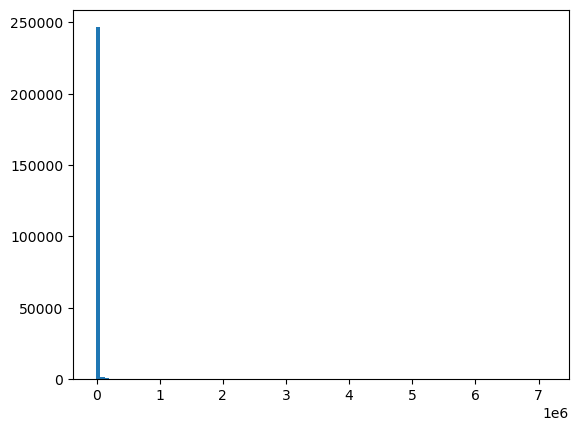

In [31]:
fig, axes = plt.subplots()
axes.hist(hist_data, bins=100)
#axes.set_xscale('log')
#axes.set_xlim(left=1.5)
#axes.set_ylim(top=100)

In [5]:
r = hudf[0] * 0.5
g = hudf[1] * 0.3
b = hudf[2] * 0.8

# hudf_rgb = make_lupton_rgb(r, g, b, Q=0.0001, stretch=0.004, filename='hudf.jpeg')

# fig = plt.figure(figsize=(10,10))
# axes = fig.add_subplot(111, projection=wcs)
# axes.imshow(hudf_rgb, origin='lower')#, norm=LogNorm(vmin=1, vmax=100), cmap='gray')

In [6]:
hudf_rgb = make_lupton_rgb(r, g, b, Q=0.0001, stretch=0.004, filename='hudf.jpeg')

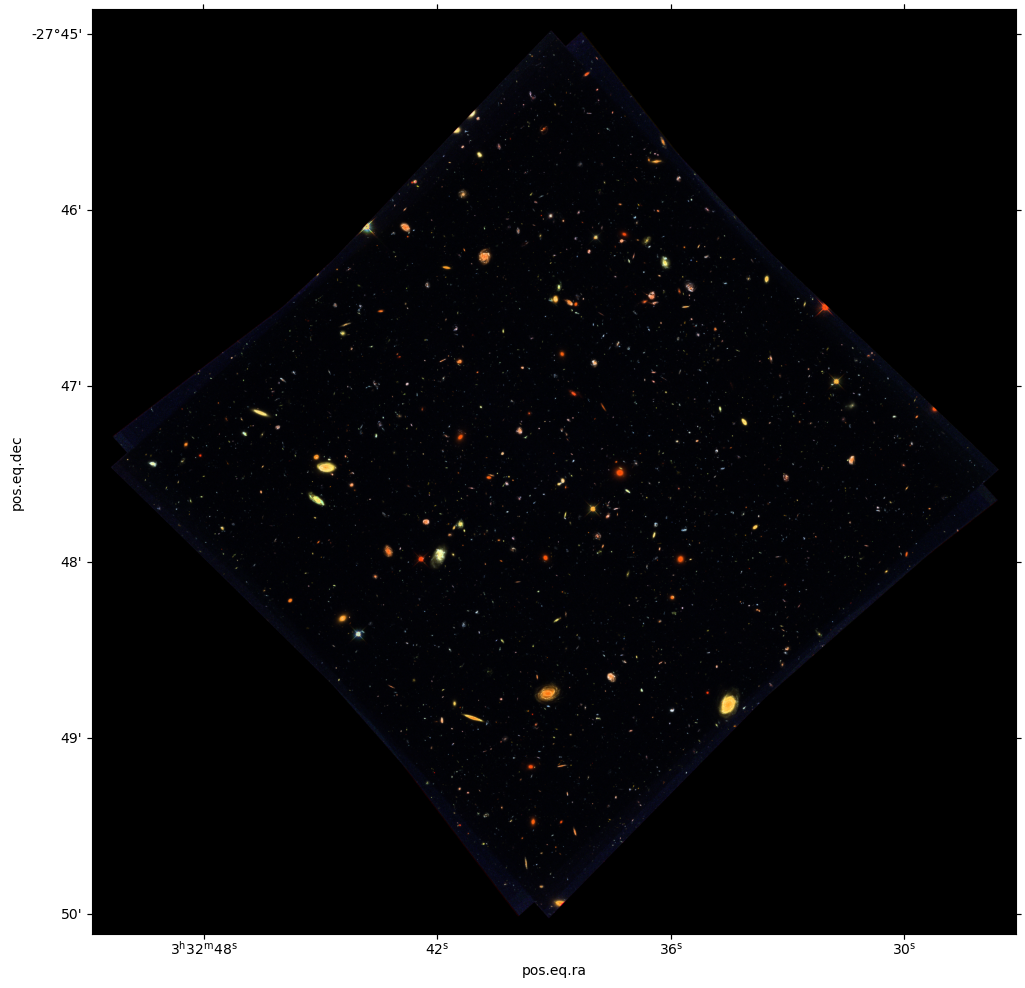

In [9]:
fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(111, projection=wcs)
axes.imshow(hudf_rgb, origin='lower')#, norm=LogNorm(vmin=1, vmax=100), cmap='gray')

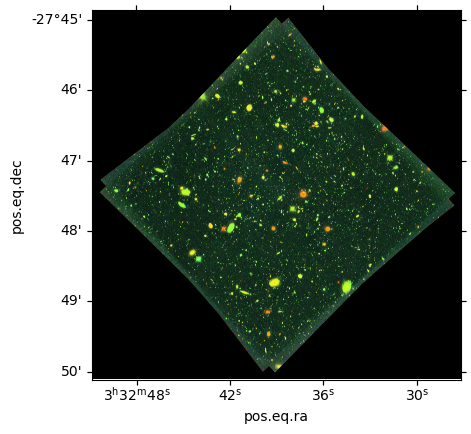

In [81]:
fig = plt.figure()
axes = fig.add_subplot(111, projection=wcs)
axes.imshow(hudf_rgb, origin='lower')#, norm=LogNorm(vmin=1, vmax=100), cmap='gray')

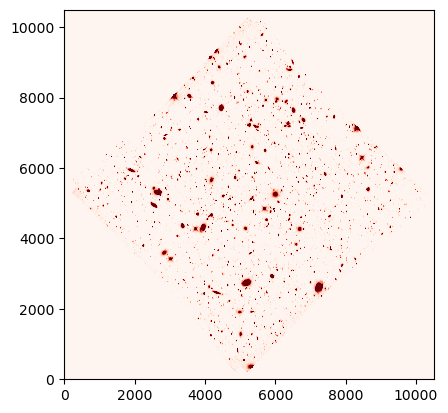

In [6]:
plt.imshow(hudf[0], origin='lower', cmap=mpl.colormaps['Reds'], vmin=0.00001, vmax=0.002)

In [5]:
services = vo.regsearch(servicetype='image', waveband='optical', keywords='hubble udf')
services.to_table()['ivoid','short_name','res_title']

ivoid,short_name,res_title
object,object,object
ivo://mast.stsci/siap/hst.udf,HST.UDF,HST Ultra Deep Field (UDF) Images


In [7]:
coord = SkyCoord('3 32 38.92 -27 47 29.37', unit=(u.hourangle, u.degree))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (53.16216667, -27.79149167)>

In [11]:
im_table = services[0].search(pos=coord, size=10, format='image/jpeg')
im_table.to_table()

filename,id,ra_j2000,dec_j2000,url,filesize,mjdmean,naxes,naxis,scale,cd,format,ref_frame,equinox,coord_projection,crpix,crval,ctype,bandpass_id,bandpass_refvalue,bandpass_unit,bandpass_hilimit,bandpass_lolimit,processing,project,preview,representative,object_id
,,deg,deg,,byte,d,,pix,deg / pix,deg / pix,,,yr,,pix,pix,,,m,m,m,m,,,,,
object,object,float64,float64,object,int32,float64,int32,object,object,object,object,object,float32,str3,object,object,object,object,float64,object,float64,float64,object,object,object,object,object
